## 머신 러닝
- '러닝' 즉 학습은 '데이터'에서 '규칙'을 스스로 찾아내는 것.
    - 학습 혹은 훈련
        - 지도(supervised) 학습, 비지도(unsupervised) 학습, 강화(reinforcement) 학습
    - 데이터에는 입력과 타겟으로 구성되어 있음.
        - 입력은 일종의 문제. 타겟은 맞춰야 할 정답. x가 입력, y가 타겟
        - 비지도 학습은 타겟이 없는 데이터를 사용. 예를 들어 클러스터링
    - 규칙은 가중치와 절편.
    - 사실 내가 관심있는 것은 강화 학습.
        - Q-learning, SARSA, DQN(Deep Q Network)
- 딥러닝은 머신 러닝의 일종. 스케일업 한것.

<function matplotlib.pyplot.show(close=None, block=None)>

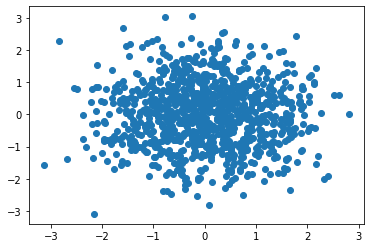

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)
plt.show

In [11]:
# 사이킷런에서 당뇨병 환자 데이터 가져오기. 이럴거면 코랩에서 하는게 낫지 않나?
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape, diabetes.target.size)
print(diabetes.data[:3], diabetes.target[:3])

(442, 10) 442
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]] [151.  75. 141.]


In [57]:
# tensor slicing test
testx = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print(testx[1:-1,-1])

[ 8 12]


In [52]:
x = diabetes.data[:, 2]
y = diabetes.target
print(type(x))

<class 'numpy.ndarray'>
[ 3  7 11 15]


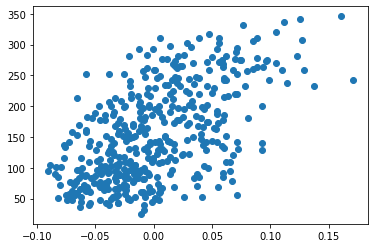

In [53]:
plt.scatter(x, y)
plt.show()

In [98]:
w = 1.0
b = 1.0

y_hat = x[0] * w +b
print(y_hat)
print(y[0])

1.0616962065186886
151.0


In [99]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [100]:
# w의 변화량 대비 y(예측값) 변화량
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


## 변화율
$$\hat{y} = w \times x + b$$
$$\hat{y}_{inc} = w_{inc} \times x + b$$
$$w_{rate} = \frac{\hat{y}_{inc} - \hat{y}}{w_{inc} - w} = \frac{(x_0 \times 
w_{inc} + b) - (x_0 \times w + b)}{w_{inc} - w}$$
$$= \frac{x_0 \times (w_{inc} - w)}{w_{inc} - w} = x_0$$

- $w\_rate$는 첫 번째 훈련 데이터 $x[0]$에 대한 변화율이라고 함.
- 변화율은 결국 $x[0]$과 같다. 당연하지. 거기 곱해지는 값이니.
- b 역시 마찬가지. b의 변화율은 1이다. b가 변한만큼 그대로 더해지니.

## 오차 역전파

In [101]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [103]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.122032764040299 75.7274477824319


In [147]:
w = 1
b = 1
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

print(w, b)

587.8654539985689 99.40935564531424


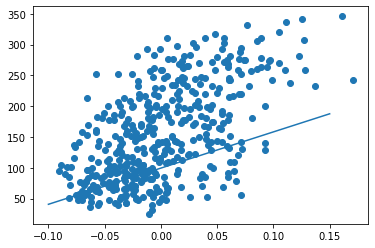

In [148]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])

In [150]:
for i in range(100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err

print(w, b)

913.5973364345905 123.39414383177204


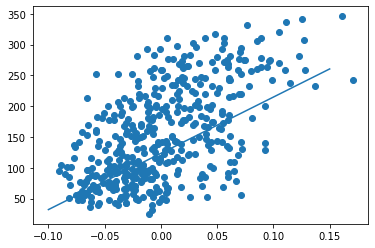

In [157]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])

## 비용 함수와 경사 하강법 관계
- 제곱 오차 $SE = (y - \hat{y})^2$

### 가중치 w에 대해 제곱 오차 미분
$$\begin{aligned}
\frac{\partial{SE}}{\partial{w}} &= \frac{\partial{}}{\partial{w}}(y - \hat{y})^2\\
&= 2(y - \hat{y})(- \frac{\partial{}}{\partial{w}}\hat{y})\\
&= 2(y - \hat{y})(-x)\\
&= -2(y - \hat{y})x\\
&= 2(\hat{y} - y)x
\end{aligned}$$

### 가중치, 절편 업데이트
- 결과에는 차이가 없으므로 그냥 $(\hat{y} - y)x$를 사용한다.
- 변화율을 빼야 비용 함수의 낮은 쪽으로 이동할 수 있음.
$$
w = w - \frac{\partial{SE}}{\partial{w}} = w - (\hat{y} - y)x\\
= w + (y - \hat{y}) x
$$
- 즉, 오차 역전파에서 해봤던 err 사용과 동일함.
    - 뭐... 약간 급하게 끼워맞춘 느낌이긴 하지만.
- 절편에 대해서도 동일하게 해준다. 이번에는 처음부터 제곱오차에 $\frac{1}{2}$를 해준다.
$$\begin{aligned}
\frac{\partial{SE}}{\partial{b}} &= \frac{\partial{}}{\partial{b}}\frac{1}{2}(y - \hat{y})^2\\
&= (y - \hat{y})(- \frac{\partial{}}{\partial{b}}\hat{y})\\
&= (y - \hat{y})(-1)\\
&= -(y - \hat{y})\\
&= (\hat{y} - y)
\end{aligned}$$
- 절편도 변화율을 빼준다.
$$
b = b - \frac{\partial{SE}}{\partial{b}} = b - (\hat{y} - y)\\
= b + (y - \hat{y})
$$
- 역시 위에서 했던 것과 마찬가지.

### 그레디언트(gradient, 경사)
- 앞으로는 편미분을 사용.
- 이쪽 바닥에서는 변화율을 그레디언트라 부른다.
    - '그레디언트'가 전파된다 등등

## 선형 회귀를 위한 유닛(뉴런) 제작

In [158]:
class Unit:
    # Neuron이라고들 하지만 요즘은 Unit을 더 즐겨 쓴다고.
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
        
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x_set, y_set, epochs = 100):
        for i in range(epochs):
            for x_i, y_i in zip(x_set, y_set):
                y_hat = self.forpass(x_i)
                err = - (y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad

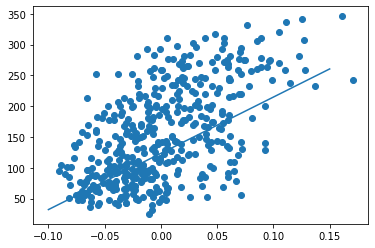

In [160]:
unit = Unit()
unit.fit(x, y)

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.show()